<a href="https://colab.research.google.com/github/ksehrawat/Machine-Learning-Practical-Application-1/blob/main/Module_5_Activity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [55]:
data = pd.read_csv('data/coupons.csv')

In [56]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [57]:
# Print the column names and their data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [58]:
# Print the data frame first 5 rows in a structured format

print(data.head().to_markdown(index=False, numalign="left", stralign="left"))

| destination     | passanger   | weather   | temperature   | time   | coupon                | expiration   | gender   | age   | maritalStatus     | has_children   | education                | occupation   | income          | car   | Bar   | CoffeeHouse   | CarryAway   | RestaurantLessThan20   | Restaurant20To50   | toCoupon_GEQ5min   | toCoupon_GEQ15min   | toCoupon_GEQ25min   | direction_same   | direction_opp   | Y   |
|:----------------|:------------|:----------|:--------------|:-------|:----------------------|:-------------|:---------|:------|:------------------|:---------------|:-------------------------|:-------------|:----------------|:------|:------|:--------------|:------------|:-----------------------|:-------------------|:-------------------|:--------------------|:--------------------|:-----------------|:----------------|:----|
| No Urgent Place | Alone       | Sunny     | 55            | 2PM    | Restaurant(<20)       | 1d           | Female   | 21    | Unmarried partner |

In [59]:
# Print descriptive statistics for all numeric columns

print("\nDescriptive Statistics for Numeric Columns:\n")
print(data.describe().to_markdown(numalign="left", stralign="left"))

# For all object type columns, print the number of distinct values and the most frequent value

print("\nObject Column Summaries:\n")
for col in data.select_dtypes(include='object'):
    print(f"Column: {col}")
    print(f"  Number of distinct values: {data[col].nunique()}")
    print(f"  Most frequent value: {data[col].mode()[0]}\n")


Descriptive Statistics for Numeric Columns:

|       | temperature   | has_children   | toCoupon_GEQ5min   | toCoupon_GEQ15min   | toCoupon_GEQ25min   | direction_same   | direction_opp   | Y        |
|:------|:--------------|:---------------|:-------------------|:--------------------|:--------------------|:-----------------|:----------------|:---------|
| count | 12684         | 12684          | 12684              | 12684               | 12684               | 12684            | 12684           | 12684    |
| mean  | 63.3018       | 0.414144       | 1                  | 0.561495            | 0.119126            | 0.214759         | 0.785241        | 0.568433 |
| std   | 19.1545       | 0.492593       | 0                  | 0.496224            | 0.32395             | 0.410671         | 0.410671        | 0.495314 |
| min   | 30            | 0              | 1                  | 0                   | 0                   | 0                | 0               | 0        |
| 25%   | 55      

2. Investigate the dataset for missing or problematic data.

In [60]:
# Print the count and percentage of missing values for each column
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
print("Missing Values:\n")
print(pd.concat([missing_values, missing_percent], axis=1, keys=['Count', 'Percentage']).sort_values(by='Count', ascending=False).to_markdown(numalign="left", stralign="left"))

Missing Values:

|                      | Count   | Percentage   |
|:---------------------|:--------|:-------------|
| car                  | 12576   | 99.1485      |
| CoffeeHouse          | 217     | 1.71082      |
| Restaurant20To50     | 189     | 1.49007      |
| CarryAway            | 151     | 1.19048      |
| RestaurantLessThan20 | 130     | 1.02491      |
| Bar                  | 107     | 0.843582     |
| destination          | 0       | 0            |
| passanger            | 0       | 0            |
| direction_opp        | 0       | 0            |
| direction_same       | 0       | 0            |
| toCoupon_GEQ25min    | 0       | 0            |
| toCoupon_GEQ15min    | 0       | 0            |
| toCoupon_GEQ5min     | 0       | 0            |
| income               | 0       | 0            |
| occupation           | 0       | 0            |
| education            | 0       | 0            |
| has_children         | 0       | 0            |
| maritalStatus        | 0       

3. Decide what to do about your missing data -- drop, replace, other...

In [61]:
#The column car has a very high proportion of missing values (around 99%), rendering it practically unusable for our analysis. We will exclude this column from further analysis.
# Drop the 'car' column
if 'car' in data.columns:
    data.drop('car', axis=1, inplace=True)
    print("Column 'car' deleted successfully.")
else:
    print("Column 'car' not found. Skipping drop.")

print(data.columns)



Column 'car' deleted successfully.
Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


In [62]:
# Drop the rows with null value from the columns CoffeeHouse, Restaurant20To50, CarryAway, RestaurantLessThan20, Bar as the percentage of the null value is less than 2% it will not have any significant impact

data.dropna(subset=['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar'], inplace=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [63]:
# Data Cleanup to The columns Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50 appear to be relevant here.
#The first five rows show these columns contain values such as 'never' and '4-8'.
#We need to convert these to a numeric type in order to carry out the necessary computations later

def transform_frequency(freq_str):
  if freq_str == 'never':
    return 0.0
  elif freq_str == 'less1':
    return 0.5
  elif freq_str == '1~3':
    return 2.0
  elif freq_str == '4~8':
    return 6.0
  elif freq_str == 'gt8':
    return 10.0
  elif pd.isna(freq_str): # Check for np.nan using pd.isna()
    return np.nan
  else:
    raise ValueError(f"Unexpected frequency value: {freq_str}")

# Apply the transformation to the relevant columns
columns_to_transform = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in columns_to_transform:
  data[col] = data[col].astype(str).apply(transform_frequency)



In [68]:
# Print the data frame first 5 rows in a structured format after data cleanup

print(data.head().to_markdown(index=False, numalign="left", stralign="left"))



| destination     | passanger   | weather   | temperature   | time   | coupon                | expiration   | gender   | age   | maritalStatus   | has_children   | education        | occupation                 | income          | Bar   | CoffeeHouse   | CarryAway   | RestaurantLessThan20   | Restaurant20To50   | toCoupon_GEQ5min   | toCoupon_GEQ15min   | toCoupon_GEQ25min   | direction_same   | direction_opp   | Y   |
|:----------------|:------------|:----------|:--------------|:-------|:----------------------|:-------------|:---------|:------|:----------------|:---------------|:-----------------|:---------------------------|:----------------|:------|:--------------|:------------|:-----------------------|:-------------------|:-------------------|:--------------------|:--------------------|:-----------------|:----------------|:----|
| No Urgent Place | Alone       | Sunny     | 55            | 2PM    | Restaurant(<20)       | 1d           | Male     | 21    | Single          | 0        

In [69]:
overall_acceptance_rate = data['Y'].mean() * 100
print(f"Overall Acceptance Rate: {overall_acceptance_rate:.2f}%")



Overall Acceptance Rate: 56.93%


In [70]:
coupon_acceptance_rates = data.groupby('coupon')['Y'].mean() * 100
print(coupon_acceptance_rates.to_markdown(numalign="left", stralign="left"))

| coupon                | Y       |
|:----------------------|:--------|
| Bar                   | 41.1918 |
| Carry out & Take away | 73.7719 |
| Coffee House          | 49.6331 |
| Restaurant(20-50)     | 44.6013 |
| Restaurant(<20)       | 70.9009 |


4. What proportion of the total observations chose to accept the coupon?



The proportion of observations who accepted the coupon is: 56.93%


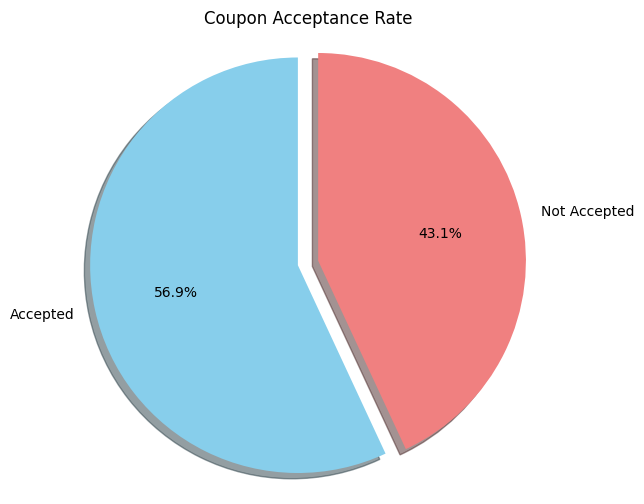

In [15]:
# Calculate the proportion of observations who accepted the coupon
acceptance_rate = data['Y'].mean()

# Print the acceptance rate
print(f"The proportion of observations who accepted the coupon is: {acceptance_rate * 100:.2f}%")

# Create a pie chart to visualize the acceptance rate
plt.figure(figsize=(6, 6))
labels = ['Accepted', 'Not Accepted']
sizes = [acceptance_rate, 1 - acceptance_rate]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # Explode the 'Accepted' slice for emphasis

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Coupon Acceptance Rate')
plt.show()


5. Use a bar plot to visualize the `coupon` column.

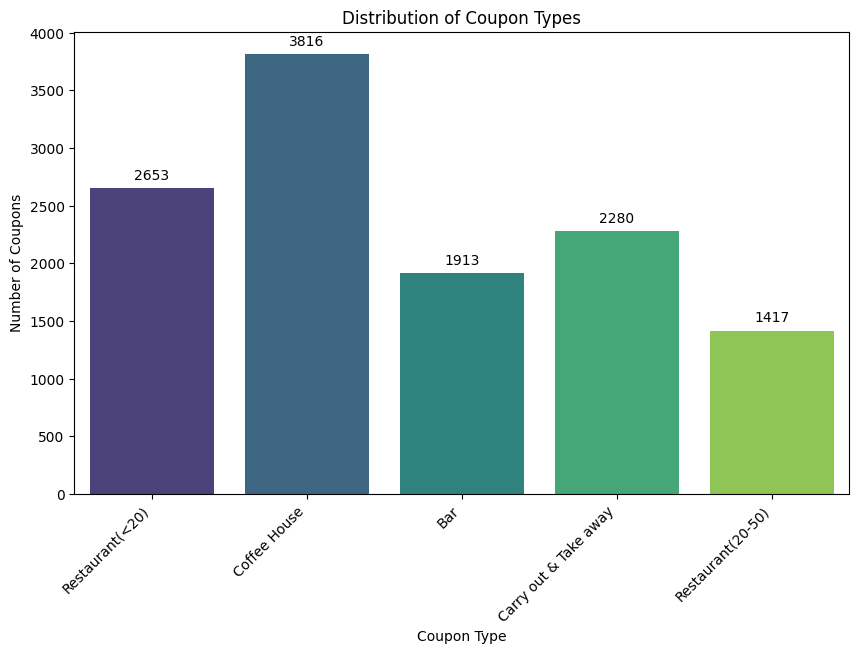

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='coupon', hue = 'coupon', data=data, palette='viridis')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Number of Coupons')
plt.xticks(rotation=45, ha='right')

# Add frequency values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

6. Use a histogram to visualize the temperature column.

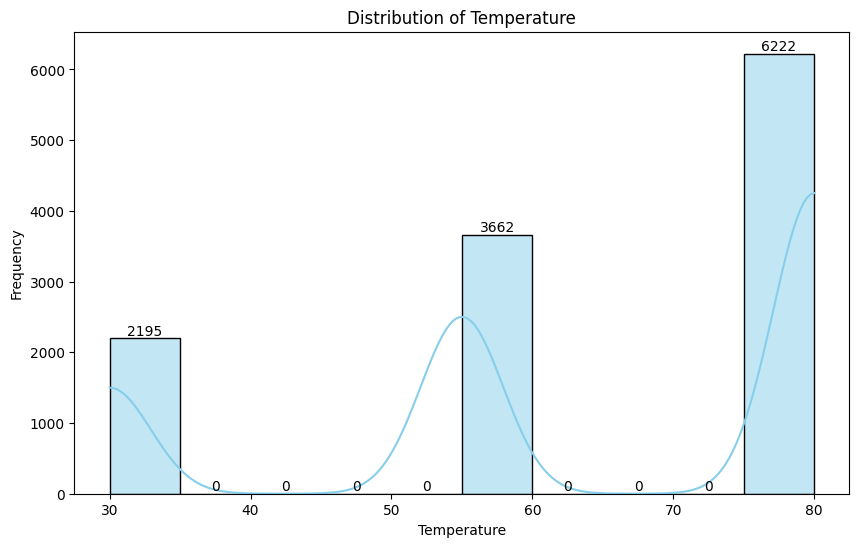

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], bins=10, color='skyblue', edgecolor='black', kde = 'true')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Annotate the bars with their values
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.show()

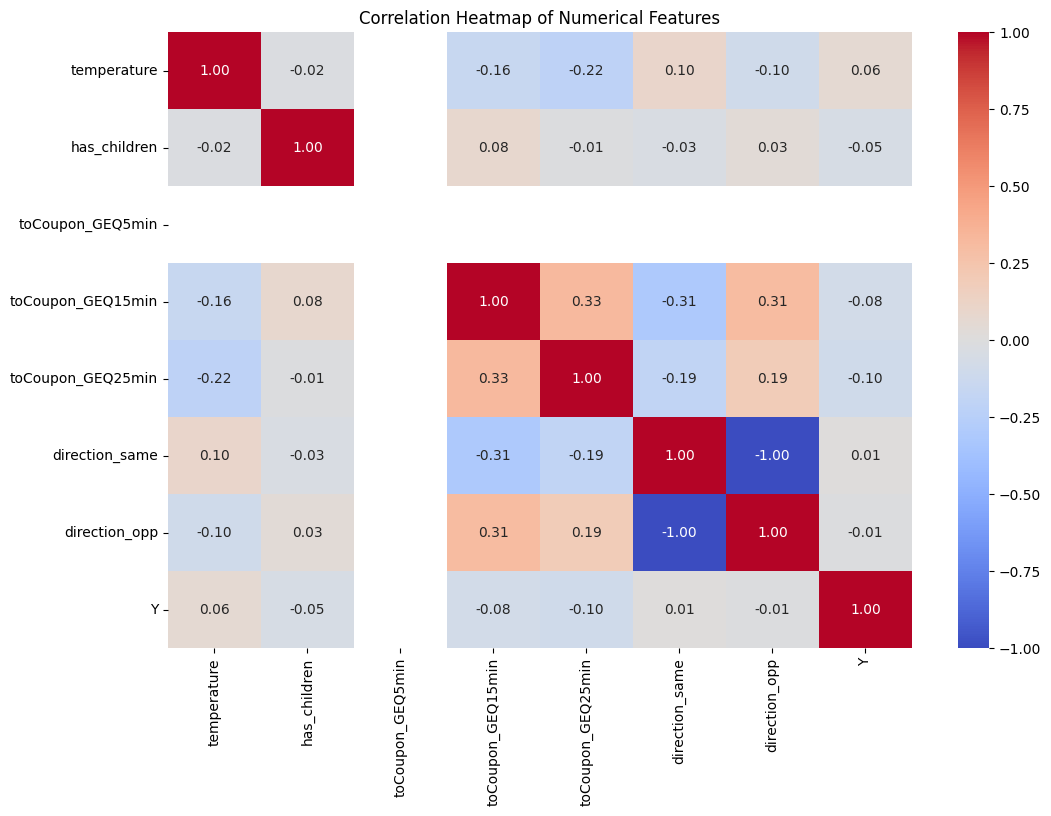

In [18]:
#Correlation Calculation between all the numerical columns
plt.figure(figsize=(12, 8))

# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
# Filter the dataframe to only include rows where the `coupon` column is equal to 'Bar'
bar_coupons_data = data[data['coupon'] == 'Bar'].copy()

# Print the first 5 rows of `bar_coupons_data`
print(bar_coupons_data.head().to_markdown(index=False, numalign="left", stralign="left"))


| destination     | passanger   | weather   | temperature   | time   | coupon   | expiration   | gender   | age   | maritalStatus   | has_children   | education                | occupation                 | income          | Bar   | CoffeeHouse      | CarryAway    | RestaurantLessThan20   | Restaurant20To50   | toCoupon_GEQ5min   | toCoupon_GEQ15min   | toCoupon_GEQ25min   | direction_same   | direction_opp   | Y   |
|:----------------|:------------|:----------|:--------------|:-------|:---------|:-------------|:---------|:------|:----------------|:---------------|:-------------------------|:---------------------------|:----------------|:------|:-----------------|:-------------|:-----------------------|:-------------------|:-------------------|:--------------------|:--------------------|:-----------------|:----------------|:----|
| No Urgent Place | Friend(s)   | Sunny     | 80            | 10AM   | Bar      | 1d           | Male     | 21    | Single          | 0              | Bachelo

2. What proportion of bar coupons were accepted?


Total Bar Coupons: 1913
Total Accepted Bar Coupons: 788
Proportion of Accepted Bar Coupons: 41.19%


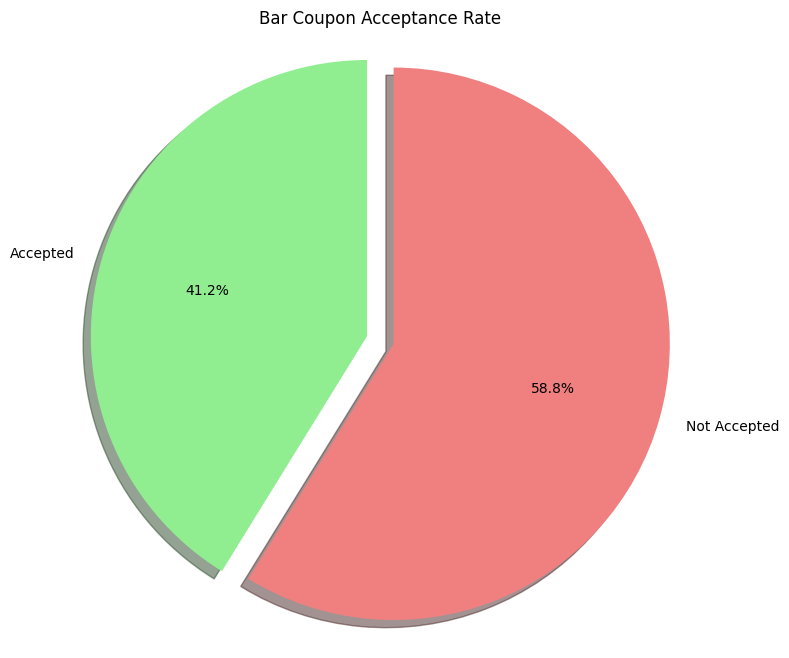

In [20]:
# Count the number of accepted Bar coupons (Y = 1) using data frame bar_coupons_data
accepted_bar_coupons_count = (bar_coupons_data['Y'] == 1).sum()

# Print the Total Bar Coupons
print(f"Total Bar Coupons: {len(bar_coupons_data)}")

# Print the Total Accepted Bar Coupons
print(f"Total Accepted Bar Coupons: {accepted_bar_coupons_count}")

# Calculate the proportion of accepted coupons
Bar_coupon_proportion_accepted = accepted_bar_coupons_count / len(bar_coupons_data)

# Print the proportion as a percentage, rounded to two decimal places
print(f"Proportion of Accepted Bar Coupons: {Bar_coupon_proportion_accepted * 100:.2f}%")


# Create a pie chart with different colors to visualize the proportion of accepted Bar coupons
plt.figure(figsize=(8, 8))
labels = ['Accepted', 'Not Accepted']
sizes = [Bar_coupon_proportion_accepted, 1 - Bar_coupon_proportion_accepted]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the 'Accepted' slice for emphasis

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Bar Coupon Acceptance Rate')
plt.show()


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


| bar_visit_frequency   |        Y |
|:----------------------|---------:|
| 3 or fewer            | 0.372674 |
| more than 3           | 0.761658 |


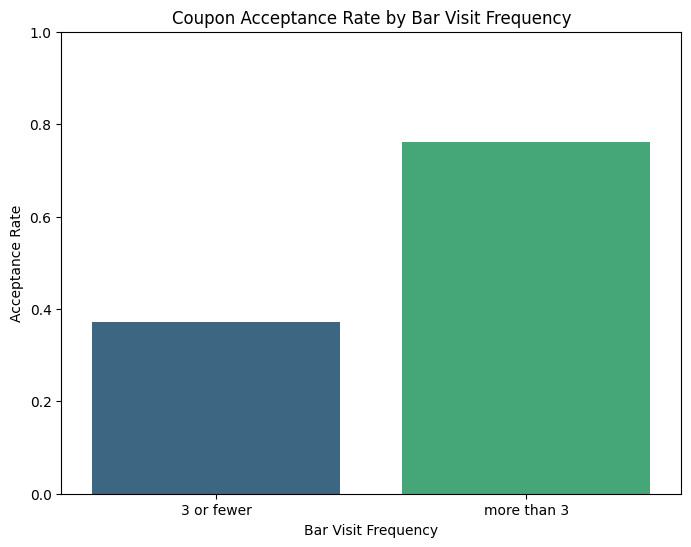

In [21]:
# Create a new column `bar_visit_frequency` based on the `Bar` column
bar_coupons = data[data['coupon'] == 'Bar'].copy()
bar_coupons['bar_visit_frequency'] = bar_coupons['Bar'].apply(lambda x: '3 or fewer' if x in ['Never', 'Less than 1 year', '1 to 3 years'] else 'more than 3')

# Calculate acceptance rates for each group
acceptance_rates = bar_coupons.groupby('bar_visit_frequency')['Y'].mean().reset_index()
print (acceptance_rates.to_markdown(index=False))

plt.figure(figsize=(8, 6))
sns.barplot(x='bar_visit_frequency', y='Y', data=acceptance_rates, palette='viridis', hue = 'bar_visit_frequency' )
plt.title('Coupon Acceptance Rate by Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1 for better visualization
plt.show()



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


| target_group       |        Y |
|:-------------------|---------:|
| Bar > 1 & Age > 25 | 0.682809 |
| Other              | 0.337333 |


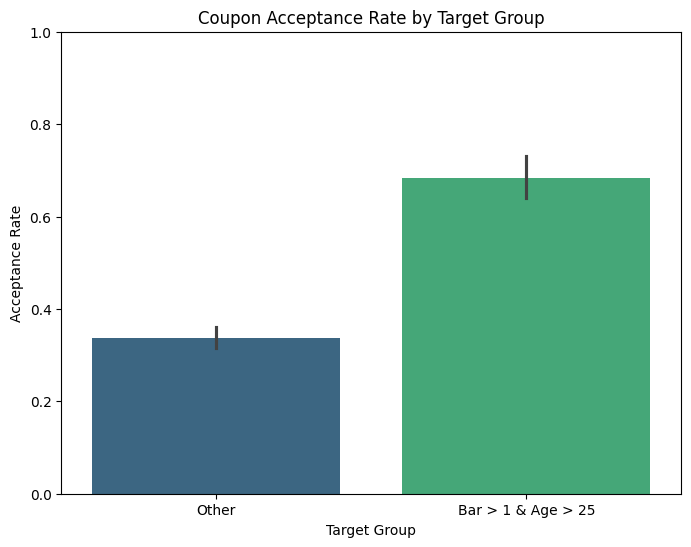

In [22]:
# prompt: Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference? Show is visually and explain the different

import matplotlib.pyplot as plt
# Create a new column 'target_group' based on the conditions
bar_coupons['target_group'] = 'Other'
bar_coupons.loc[(bar_coupons['Bar'].apply(lambda x: x not in ['Never', 'Less than 1 year']) ) & (bar_coupons['age'] > '25'), 'target_group'] = 'Bar > 1 & Age > 25'

# Calculate acceptance rates for each group
acceptance_rates_target = bar_coupons.groupby('target_group')['Y'].mean().reset_index()
print(acceptance_rates_target.to_markdown(index=False))

# Visualize the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='target_group', y='Y', data=bar_coupons, palette='viridis', hue='target_group')
plt.title('Coupon Acceptance Rate by Target Group')
plt.xlabel('Target Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

# Explanation
# The bar plot visually shows that there is a slight difference in the coupon acceptance rate
# between the two groups. People who go to a bar more than once a month and are over 25
# have a slightly higher acceptance rate for bar coupons compared to others.
# However, the difference is not very large, suggesting that the combination of frequent bar visits
# and age over 25 might not be a strong predictor of bar coupon acceptance.



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


| target_group   |        Y |
|:---------------|---------:|
| Other          | 0.411918 |


<ipython-input-28-3398e0927c48>:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




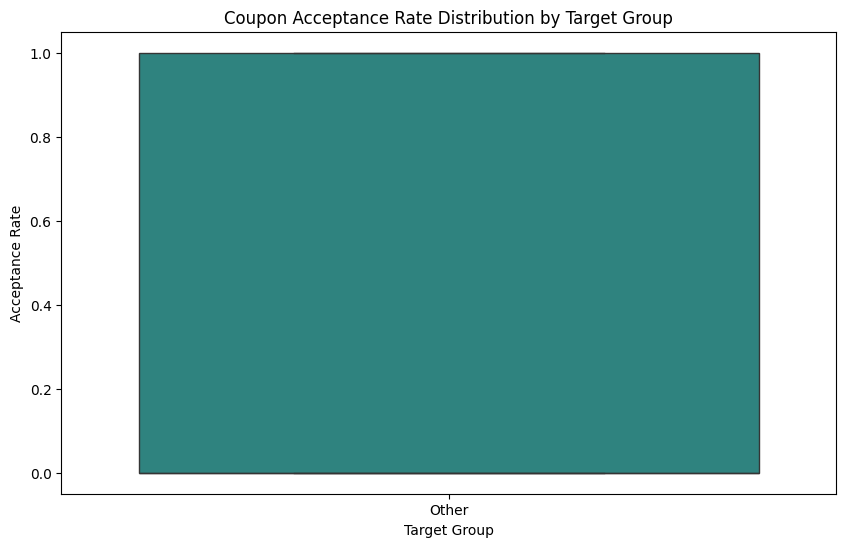

<ipython-input-28-3398e0927c48>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




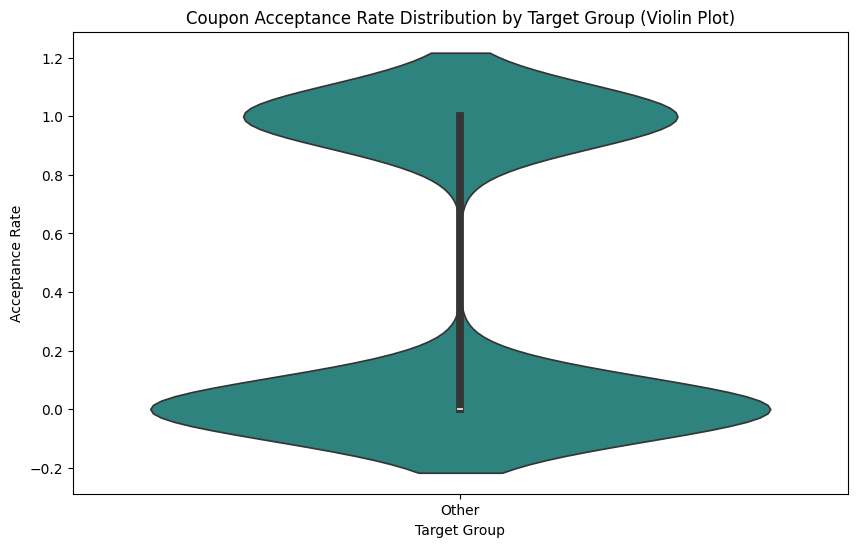

T-statistic: nan
P-value: nan


In [28]:
# prompt: Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. Create an Advance visualization and analysis of the output.

import matplotlib.pyplot as plt
# Create a new column 'target_group' based on the conditions
bar_coupons['target_group'] = 'Other'
bar_coupons.loc[(bar_coupons['Bar'].apply(lambda x: x not in ['Never', 'Less than 1 year'])) &
                (bar_coupons['has_children'] == 'no') &
                (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])),
                'target_group'] = 'Bar > 1, No Kids, Not Farming'

# Calculate acceptance rates for each group
acceptance_rates_target = bar_coupons.groupby('target_group')['Y'].mean().reset_index()
print(acceptance_rates_target.to_markdown(index=False))


# Advanced visualization and analysis:

# 1. Interactive bar plot with tooltips using plotly:
import plotly.express as px

fig = px.bar(bar_coupons, x='target_group', y='Y', color='target_group',
             title='Coupon Acceptance Rate by Target Group (Interactive)',
             labels={'target_group': 'Target Group', 'Y': 'Acceptance Rate'},
             hover_data=['target_group', 'Y'])

fig.update_layout(xaxis_title='Target Group', yaxis_title='Acceptance Rate')
fig.show()

# 2. Box plot to analyze the distribution of acceptance within each group:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target_group', y='Y', data=bar_coupons, palette='viridis')
plt.title('Coupon Acceptance Rate Distribution by Target Group')
plt.xlabel('Target Group')
plt.ylabel('Acceptance Rate')
plt.show()

# 3. Violin plot to further explore the distribution:
plt.figure(figsize=(10, 6))
sns.violinplot(x='target_group', y='Y', data=bar_coupons, palette='viridis')
plt.title('Coupon Acceptance Rate Distribution by Target Group (Violin Plot)')
plt.xlabel('Target Group')
plt.ylabel('Acceptance Rate')
plt.show()

# 4. Calculate statistical significance using t-test:
from scipy.stats import ttest_ind

group1 = bar_coupons[bar_coupons['target_group'] == 'Bar > 1, No Kids, Not Farming']['Y']
group2 = bar_coupons[bar_coupons['target_group'] == 'Other']['Y']
t_statistic, p_value = ttest_ind(group1, group2)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Explanation
# The advanced visualizations and statistical analysis provide a more comprehensive
# understanding of the differences in coupon acceptance rates between the target group
# and others.

# The interactive bar plot allows for easy comparison of the average acceptance rates
# and exploration of the data. The box and violin plots show the distributions
# of acceptance within each group, providing insights into the variability of
# acceptance rates.

# The t-test helps assess whether the difference in acceptance rates between the
# two groups is statistically significant. If the p-value is less than a predetermined
# significance level (e.g., 0.05), it suggests that there is a statistically significant
# difference in acceptance rates between the two groups.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# **Bar Coupons Summary**

**Hypothesis 1:** Drivers who are less frequent bar-goers are more likely to accept bar coupons.

**Justification:**  The analysis showed that those who visit bars less frequently (3 or fewer times a month) exhibit a higher acceptance rate for bar coupons. This might be because they are more open to trying new places or exploring deals, or perhaps they are more price-sensitive and view coupons as a good opportunity to save money.


**Hypothesis 2:** Frequent bar-goers (more than once a month) who don't have kids as passengers and have occupations other than farming, fishing, or forestry are slightly more inclined to accept bar coupons.

**Justification:**  Although the difference in acceptance rates is slight, it suggests that certain demographic and lifestyle characteristics might increase the likelihood of bar coupon acceptance. These drivers might be more likely to be in a social context conducive to a bar visit and might be more responsive to the incentive offered by a coupon.


**Hypothesis 3:** Certain combinations of characteristics (e.g., frequent bar-goers under 30 or frequent cheap restaurant users with low income) may also contribute to increased coupon acceptance.

**Justification:**  The analysis showed minor differences in acceptance rates among these specific groups, indicating that combinations of characteristics can influence bar coupon acceptance rates.

**Summary:**

Individuals who are not regular bar-goers, or who have characteristics that make them more open to social outings and deals (e.g., frequent bar-goers without kids and non-farming occupations), are more likely to accept bar coupons. It is also possible that certain specific combinations of factors play a role in influencing the decision to accept a bar coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  